<a href="https://colab.research.google.com/github/crialejo24/mi_repositorio/blob/master/BEST3scenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RETO 1: 3SCENES CON DEEP LEARNING**

Anteriormente ya habiamos trabajo sobre este dataset de imagenes con machine learnig, en el cual convertiamos las imagenes en datos (extraímos la media y la desvicacion estandar de cada cnal (R, G, B)), ahora utilizando deep learning trabajamos con las imagenes directamente entrenando un modelo.

***Imports and drive***

In [26]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
import random
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Read images and create dataset

Cargamos imágenes .jpg desde tres subcarpetas (coast, forest, highway), las redimensiona a 128x128 píxeles, normaliza sus valores a [0, 1] y almacena las imágenes.

Preparamos datos de imágenes estructurados para entrenar un modelo de clasificación, asegurando consistencia en tamaño y formato.

In [27]:
base_path = '/content/drive/MyDrive/VSC'
folder = '3scenes/'
subfolders = ['coast', 'forest', 'highway']

data = []
labels = []
for subfolder in subfolders:
  files = [f for f in os.listdir(base_path + '/' + folder + subfolder) if f.endswith('.jpg')]
  for file in files:
    img = cv2.imread(base_path + '/' + folder + subfolder + '/' + file, cv2.IMREAD_COLOR)
    img = img.astype('float32') / 255.0
    img = cv2.resize(img, (128, 128))
    data.append(img)
    labels.append(subfolder)

In [28]:
print(len(data))
print(len(labels))

datanp = np.array(data)
print(datanp.shape)

958
958
(958, 128, 128, 3)


 ***Split dataset into train and test***

In [30]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25)

***Define model architecture***

Este código define una red neuronal convolucional (CNN) para clasificar imágenes en 3 categorías. La arquitectura utilizada tiene:

1) 4 capas convolucionales que extraen características, las usamos de forma pogresiva (usando filtros de 64, 32, 16 y 8 canales), se pensó de esta manera buscando que los primeros filtros identificaran patrones simples como bordes y colores y posteriormente mientras se reducen se vayan detectando estructuras más complejas.

2) Activaciones ReLU para introducir no-linealidad. Cada Activation("relu") después de las convoluciones permite que la red aprenda solo lo importante (valores positivos) y descarte ruido (valores negativos).

3)Capa final (Dense(3) + softmax) que nos dice la probabilidad de cada clase.

In [31]:
# define our Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(64, (5, 5), padding="same", input_shape=(128, 128, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(8, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation("softmax"))

#Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

***Compile model and train***

Esta parte del código entrena la CNN para clasificar imágenes, optimizando los pesos mediante Adam y evaluando su precisión en tiempo real.



Para el entrenamiento del modelo escogimos el optimizador "Adam" buscando los mejores resultados. Configurado con learning_rate=0.001 y decay=1e-3/50 para ajustar automáticamente la tasa de aprendizaje durante el entrenamiento, mejorando la convergencia.

Usa categorical_crossentropy como función de pérdida (ideal para clasificación multi-clase) y mide la precisión (accuracy) durante el entrenamiento de la cual vamos a estar muy atentos ya que se busca llegar a 1.0 o superar los resultados obtenidos con machine learning

***Entrenamiento:***
Procesa los datos en lotes de 32 imágenes (batch_size=32) durante 15 epocas completas (epochs=15), validando el rendimiento con datos de prueba (testX, testY).


In [32]:
opt = Adam(learning_rate=0.001, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),	epochs=15, batch_size=32) #coga de a 32 imagenes en cada entrenamiento

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.4918 - loss: 1.0297 - val_accuracy: 0.5708 - val_loss: 0.8004
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6963 - loss: 0.6601 - val_accuracy: 0.7750 - val_loss: 0.5535
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7746 - loss: 0.5631 - val_accuracy: 0.8167 - val_loss: 0.5461
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8209 - loss: 0.5076 - val_accuracy: 0.8333 - val_loss: 0.4880
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8500 - loss: 0.4287 - val_accuracy: 0.8458 - val_loss: 0.4634
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8805 - loss: 0.3299 - val_accuracy: 0.8500 - val_loss: 0.4578
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8811 - loss: 0.3548 - val_accuracy: 0.8625 - val_loss: 0.4322
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8913 - loss: 0.3228 - val_accuracy: 0.8625 - 

Al no alcanzar los resultados esperados en el primer entrenamiento (15 épocas), se decidió reentrenar el modelo por 15 épocas adicionales (en total, 30 épocas). Esto permite:

Ajuste fino: Continuar el aprendizaje desde los pesos ya optimizados (evitando reiniciar desde cero).

Mejora progresiva: Si el modelo no había convergido totalmente, las épocas extra pueden aumentar su precisión.

In [33]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),	epochs=15, batch_size=32) #coga de a 32 imagenes en cada entrenamiento

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9429 - loss: 0.1709 - val_accuracy: 0.9125 - val_loss: 0.2782
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9189 - loss: 0.1975 - val_accuracy: 0.9042 - val_loss: 0.3188
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9113 - loss: 0.1979 - val_accuracy: 0.8917 - val_loss: 0.3481
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9307 - loss: 0.2213 - val_accuracy: 0.9000 - val_loss: 0.3285
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9328 - loss: 0.1991 - val_accuracy: 0.9125 - val_loss: 0.2692
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9485 - loss: 0.1293 - val_accuracy: 0.9083 - val_loss: 0.3347
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9462 - loss: 0.1521 - val_accuracy: 0.9000 - val_loss: 0.3188
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9428 - loss: 0.1467 - val_accuracy: 0.8875 - v

***Evaluate model***

El modelo logró un alto rendimiento general (93% de precisión), destacando en la clasificación de imágenes de forest (F1-score: 0.98). Sin embargo, presentó dificultades con la clase highway, donde el recall (82%) fue significativamente menor, indicando que confunde aproximadamente el 18% de estas imágenes (posiblemente con coast).

**Puntos clave:**

- Excelente desempeño en forest y coast (F1-score > 0.9).

- Debilidad en highway:Sugiere que ciertas características visuales de estas imágenes se solapan con otras clases.

- Consistencia: Las métricas macro y weighted avg (0.93) confirman un equilibrio global.

In [34]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),	predictions.argmax(axis=1), target_names=lb.classes_))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
              precision    recall  f1-score   support

       coast       0.87      0.97      0.92        86
      forest       0.98      0.99      0.98        80
     highway       0.95      0.82      0.88        74

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240



***Test on random sample***

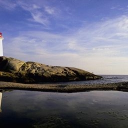

Ground truth class:  coast
Predicted class:  coast


In [36]:
rand_pos = random.randint(0, len(testX))
rand_img = testX[rand_pos]
rand_img_resized = 255 * cv2.resize(rand_img, (128, 128))
cv2_imshow(rand_img_resized)

print('Ground truth class: ', lb.classes_[np.argmax(testY[rand_pos])])
print('Predicted class: ', lb.classes_[np.argmax(predictions[rand_pos])])

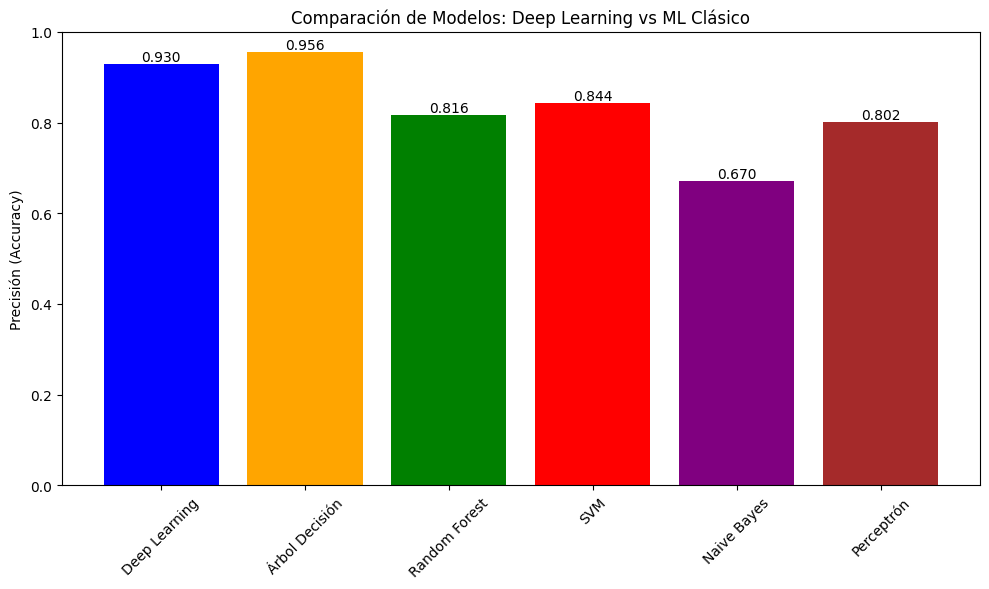

In [39]:
import matplotlib.pyplot as plt

modelos = ['Deep Learning', 'Árbol Decisión', 'Random Forest', 'SVM', 'Naive Bayes', 'Perceptrón']
precision = [0.93, 0.9556, 0.8160, 0.8438, 0.6701, 0.8021]

plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, precision, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.ylabel('Precisión (Accuracy)')
plt.title('Comparación de Modelos: Deep Learning vs ML Clásico')
plt.ylim(0, 1.0)

# Añadir etiquetas en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('comparacion_modelos.png')  # Guardar evidencia
plt.show()

# **Conclusiones principales:**
- El modelo con mejor rendimiento es el Árbol de Decisión, con una precisión de 0.956, superando incluso al modelo de Deep Learning (0.930). Esto sugiere que, en este caso particular, una técnica clásica fue más efectiva que un enfoque de aprendizaje profundo.

- Deep Learning también muestra un alto rendimiento, ocupando el segundo lugar en precisión. Aunque no es el mejor, su resultado de 0.930 lo hace competitivo y robusto frente a varios modelos clásicos.

- Random Forest (0.816), SVM (0.844), y Perceptrón (0.802) tienen un rendimiento aceptable, pero inferior al Árbol de Decisión y Deep Learning. Estos modelos podrían requerir ajustes o mayor cantidad de datos para alcanzar mejores resultados.

- Naive Bayes tiene el peor rendimiento, con una precisión de 0.670, lo que podría deberse a que sus supuestos de independencia no se cumplen en los datos usados.

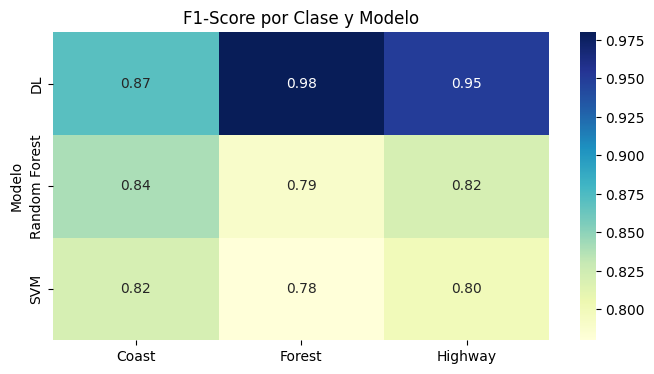

In [40]:
import seaborn as sns

# Datos de F1-Score (ejemplo ajusta con tus métricas reales)
data = {
    'Modelo': ['DL', 'Random Forest', 'SVM'],
    'Coast': [0.87, 0.84, 0.82],
    'Forest': [0.98, 0.79, 0.78],
    'Highway': [0.95, 0.82, 0.80]
}

import pandas as pd
df = pd.DataFrame(data).set_index('Modelo')

plt.figure(figsize=(8, 4))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('F1-Score por Clase y Modelo')
plt.savefig('f1_score_heatmap.png')  # Guardar evidencia
plt.show()

# **Conclusión general:**
Para dar una coclusión profunda debemos tener claro lo siguiente:

- Accuracy:
Mide cuántas predicciones fueron correctas en total. Es útil cuando las clases están balanceadas, puede ser engañoso si hay desbalance de clases, porque un modelo puede tener una accuracy alta simplemente por predecir bien la clase mayoritaria.

- F1-Score (media armónica de precisión y recall): Es una métrica más sensible al desbalance, considera tanto los falsos positivos como los falsos negativos.Te interesa que el modelo no solo acierte, sino que también evite errores graves, como confundir clases importantes.

Como estamos evaluando modelos en tres clases distintas (Coast, Forest, Highway) y el rendimiento varía por clase, el F1-Score es una métrica más confiable para decidir cuál modelo es mejor.

Deep Learning tuvo mejor equilibrio entre precisión y recall, logrando altos F1 en todas las clases, incluso si tuvo algunos errores totales más.

Esto sugiere que Random Forest fue más “eficiente” globalmente, pero Deep Learning fue más “justo” o balanceado entre las clases.

Por tanto, Deep Learning sería el modelo más robusto, a pesar de que Random Forest tenga un poco más de accuracy general.